In [1]:
from correlation import *
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
PATH = '../../data/idaweb/observations_enriched_WRF_reduced.pkl'

df = pd.read_pickle(PATH)

In [3]:
df_coords = df[['X','Y']].groupby(['X','Y']).mean().reset_index()

In [23]:
# Convert precipitation magnitude to occurrence (0 or 1)
df['precip_occurrence'] = (df['Prec'] > 0).astype(int)

In [10]:
df_corr, mask = build_corr_df(df, corr_series='Prec', basin=False)

In [24]:
df_corr_oc, mask_oc = build_corr_df(df, corr_series='precip_occurrence', basin=False)

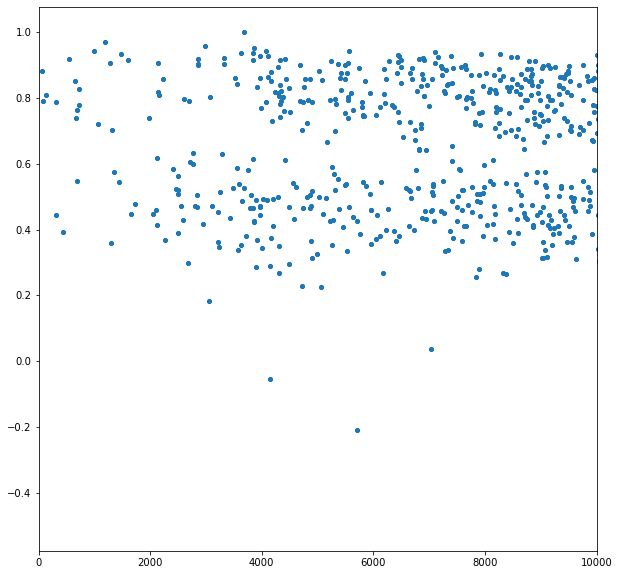

In [63]:
x = df_corr[mask]['dist']
y = df_corr[mask]['corr']

plt.figure(figsize=(10,10))
plt.scatter(x,y, s=15)
plt.xlim(0,10000)
plt.show()

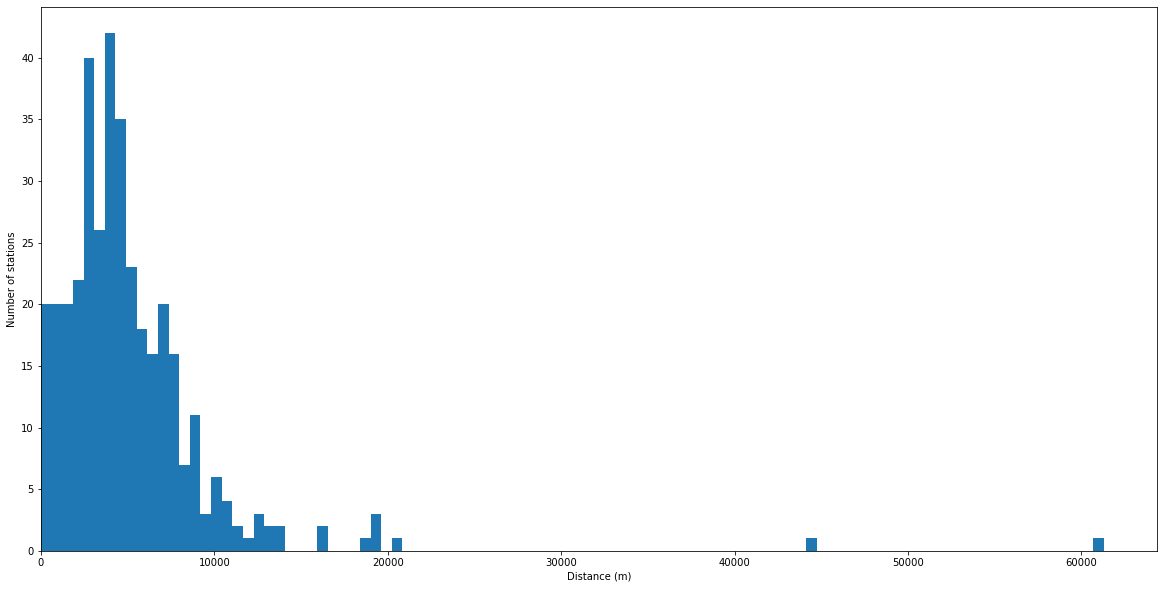

In [60]:
plt.figure(figsize=(20,10))
plt.hist(df_corr[mask].groupby('S1').min()['dist'], bins=100)
plt.ylabel('Number of stations')
plt.xlim(0,)
plt.xlabel('Distance (m)')
plt.show()

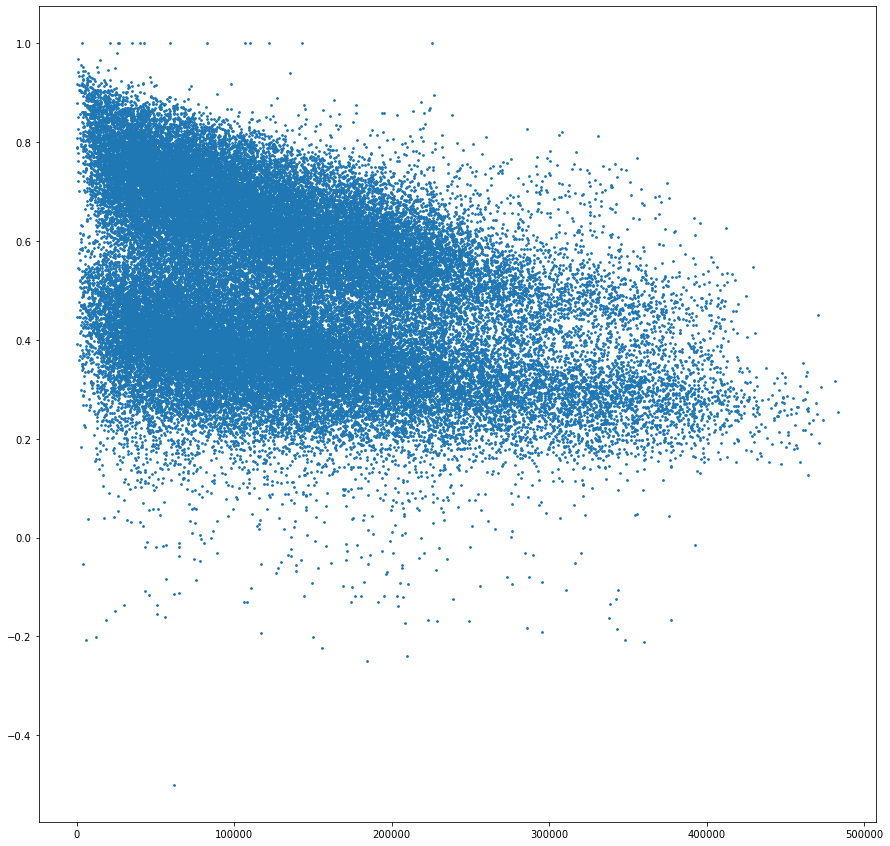

In [26]:
x1 = df_corr_oc[mask]['dist']
y1 = df_corr_oc[mask]['corr']

plt.figure(figsize=(15,15))
plt.scatter(x,y, s=2)
plt.show()